# Description
## Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

You need to identify the best possible model that will give the required performance

## Objective

Explore and visualize the dataset.
Build a classification model to predict if the customer is going to churn or not
Optimize the model using appropriate techniques
Generate a set of insights and recommendations that will help the bank

## Data Dictionary:
- CLIENTNUM: Client number. Unique identifier for the customer holding the account
- Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
- Customer_Age: Age in Years
- Gender: Gender of the account holder
- Dependent_count: Number of dependents
- Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
- Marital_Status: Marital Status of the account holder
- Income_Category: Annual Income Category of the account holder
- Card_Category: Type of Card
- Months_on_book: Period of relationship with the bank
- Total_Relationship_Count: Total no. of products held by the customer
- Months_Inactive_12_mon: No. of months inactive in the last 12 months
- Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
- Credit_Limit: Credit Limit on the Credit Card
- Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
- Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
- Total_Trans_Amt: Total Transaction Amount (Last 12 months)
- Total_Trans_Ct: Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
- Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
- Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
from collections import Counter
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
# To impute missing values
from sklearn.impute import KNNImputer

# To build a logistic regression model
from sklearn.linear_model import LogisticRegression

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To suppress the warnings
import warnings

# To tune model, get different metric scores and split data
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)
# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

## Loading the Dataset

In [2]:
# Read data
df=pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Show the datatypes

In [3]:
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
CLIENTNUM                   10127 non-null int64
Attrition_Flag              10127 non-null object
Customer_Age                10127 non-null int64
Gender                      10127 non-null object
Dependent_count             10127 non-null int64
Education_Level             8608 non-null object
Marital_Status              9378 non-null object
Income_Category             10127 non-null object
Card_Category               10127 non-null object
Months_on_book              10127 non-null int64
Total_Relationship_Count    10127 non-null int64
Months_Inactive_12_mon      10127 non-null int64
Contacts_Count_12_mon       10127 non-null int64
Credit_Limit                10127 non-null float64
Total_Revolving_Bal         10127 non-null int64
Avg_Open_To_Buy             10127 non-null float64
Total_Amt_Chng_Q4_Q1        10127 non-null float64
Total_Trans_Amt             10127 non-null int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


## Initial observation on dataset
- 10127 rows and 21 columns
- Customer age range from 26 to 73 
- Dependent range from 0 to 5
- Credit limit ranges from 1483.3 to 34516

## Data Cleansing

### Drop duplicates if any


In [6]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.shape

(10127, 21)

- No duplicates in dataset

### Check for the null values in each column

In [7]:
df.isnull().any()

CLIENTNUM                   False
Attrition_Flag              False
Customer_Age                False
Gender                      False
Dependent_count             False
Education_Level              True
Marital_Status               True
Income_Category             False
Card_Category               False
Months_on_book              False
Total_Relationship_Count    False
Months_Inactive_12_mon      False
Contacts_Count_12_mon       False
Credit_Limit                False
Total_Revolving_Bal         False
Avg_Open_To_Buy             False
Total_Amt_Chng_Q4_Q1        False
Total_Trans_Amt             False
Total_Trans_Ct              False
Total_Ct_Chng_Q4_Q1         False
Avg_Utilization_Ratio       False
dtype: bool

## Data Visualization

### Customer age distribution

Text(0.5, 1.0, 'Credit Card Customer Age Distribution')

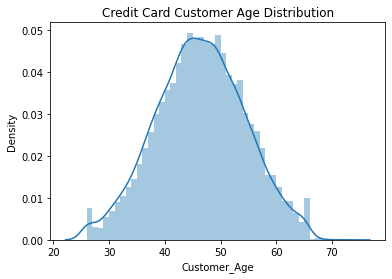

In [8]:
sns.distplot(df['Customer_Age'])
plt.title('Credit Card Customer Age Distribution')

* Customer age is normally distributed. 
* Most of the customer age are clustered around the mean value (between 40 to 60).

### Compare Customer gender count (Male vs Female)

In [9]:
#count the number of gender
df['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

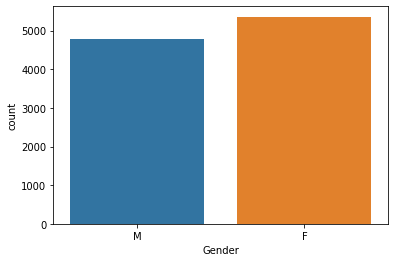

In [10]:
# visualize gender count
sns.countplot(data=df, x='Gender')

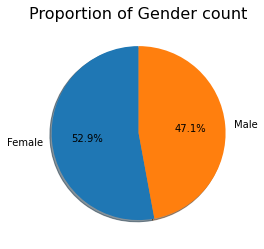

In [11]:
plt.pie(df['Gender'].value_counts(), labels = ['Female', 'Male'], autopct='%1.1f%%', shadow = True, startangle = 90)
plt.title('Proportion of Gender count', fontsize = 16)
plt.show()

**Observation**
- Proportion of gender is almost equally distributed. Female is bit higher than male

### Compare existing and attrited customers count

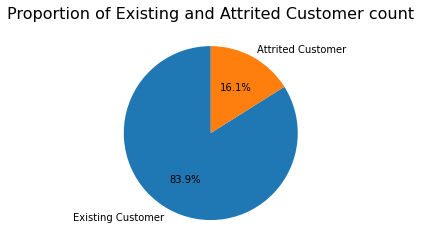

In [12]:
plt.pie(df['Attrition_Flag'].value_counts(), labels = ['Existing Customer', 'Attrited Customer'], 
        autopct='%1.1f%%', startangle = 90)
plt.title('Proportion of Existing and Attrited Customer count', fontsize = 16)
plt.show()

**Observation**
- Proportion of customer is highly imbalanced compare to proportion of gender count

### Proportion of existing and attrited customer by gender

Text(0.5, 1.0, 'Existing and Attrited Customers by Gender')

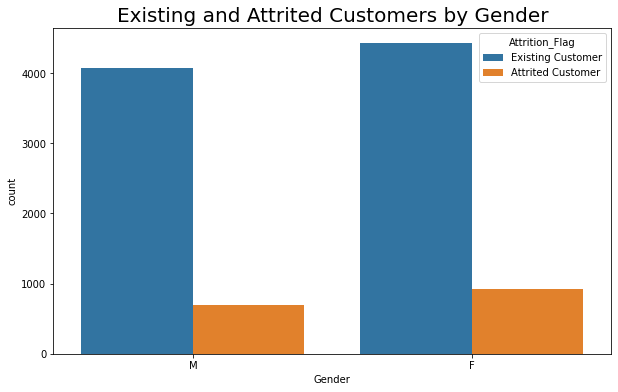

In [13]:
#visualize to see the number of existing and attrited customers by gender
plt.figure(figsize=(10,6))
sns.countplot(x='Gender', hue='Attrition_Flag', data=df)
plt.title('Existing and Attrited Customers by Gender', fontsize=20)

**Observation**
- Proportion of customers by gender in bar charts are same and comparable

### Compare the Education levels

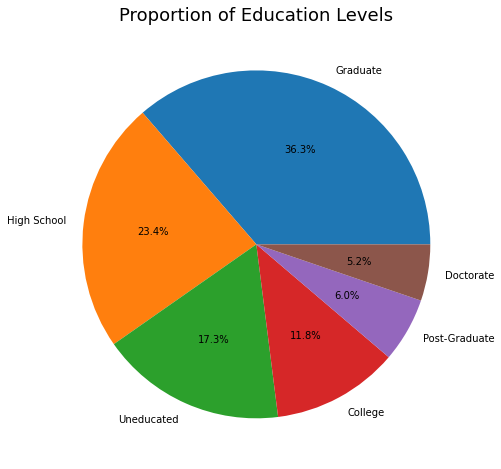

In [14]:
edu = df['Education_Level'].value_counts().to_frame('Counts') 
plt.figure(figsize = (8,8))
plt.pie(edu['Counts'], labels = edu.index, autopct = '%1.1f%%')
plt.title('Proportion of Education Levels', fontsize = 18)
plt.show()

### Proportion of education level by existing and attrited customer

Text(0.5, 1.0, 'Education level by Gender')

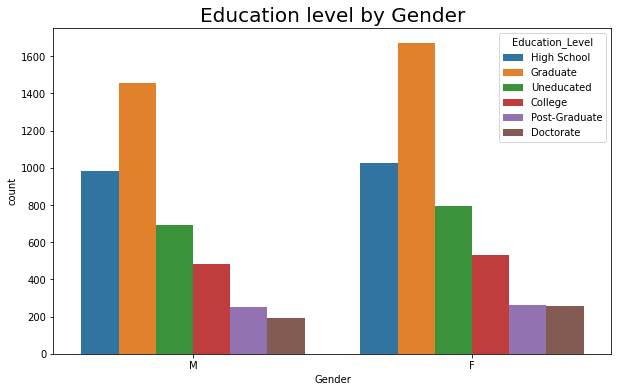

In [15]:
# Proportion of education level by gender
plt.figure(figsize=(10,6))
sns.countplot(x='Gender', hue='Education_Level', data=df)
plt.title('Education level by Gender', fontsize=20)

### Proportion of education level by gender

Text(0.5, 1.0, 'Education Level by gender')

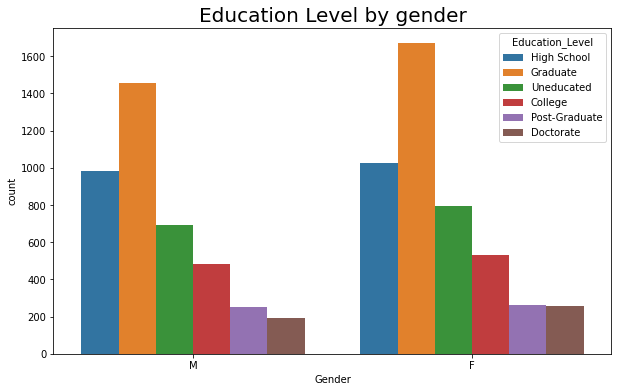

In [16]:
# By countplot
plt.figure(figsize=(10,6))
sns.countplot(x='Gender', hue='Education_Level', data=df)
plt.title('Education Level by gender', fontsize=20)

**Observation**
- Both male and female are concentrated towards graduate level
- A very less % of population are post-graduate and doctorate in both male and females

### Compare marital status of customers

In [17]:
df['Marital_Status'].value_counts()

Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64

Text(0.5, 1.0, 'Marital status by gender')

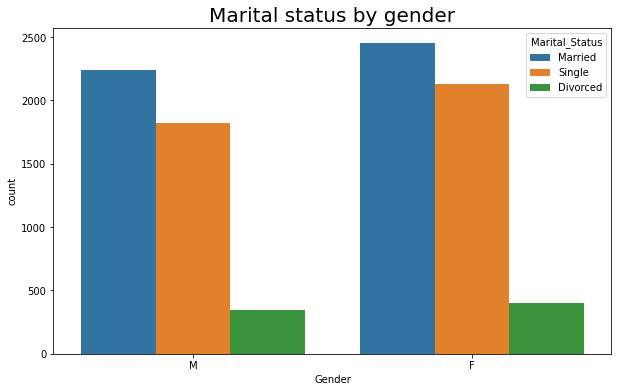

In [18]:
# By countplot
plt.figure(figsize=(10,6))
sns.countplot(x='Gender', hue='Marital_Status', data=df)
plt.title('Marital status by gender', fontsize=20)

### Compare marital status of customers with atrrited/existing

Text(0.5, 1.0, 'Attrited and Existing Customers by Marital Status')

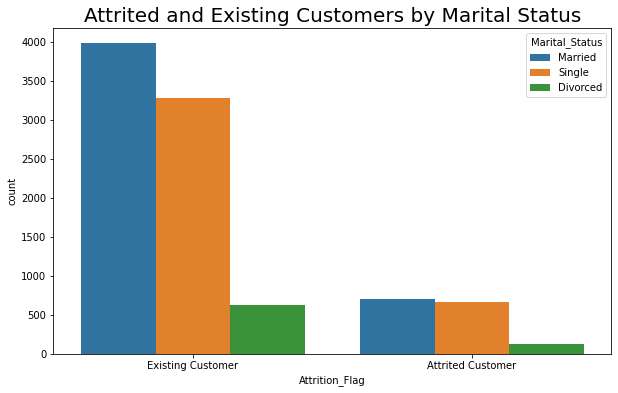

In [19]:
# By countplot
plt.figure(figsize=(10,6))
sns.countplot(x='Attrition_Flag', hue='Marital_Status', data=df)
plt.title('Attrited and Existing Customers by Marital Status', fontsize=20)

**Observation**
- Attrited customer for both married and single are comparable . The values are less than existing customer

### Compare income category by customer

Text(0.5, 1.0, 'Attrited and Existing Customers by Marital Status')

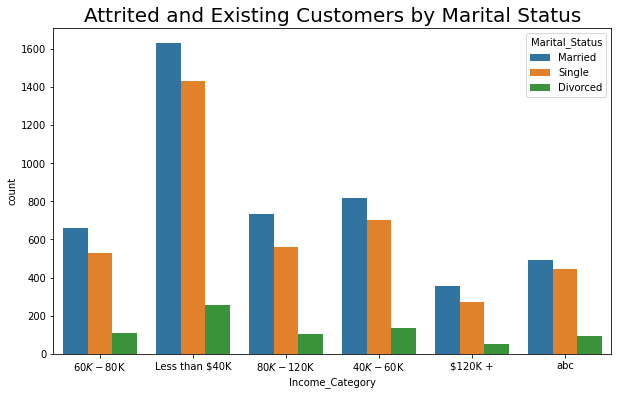

In [20]:
# Proportion of income category by customer
plt.figure(figsize=(10,6))
sns.countplot(x='Income_Category', hue='Marital_Status', data=df)
plt.title('Attrited and Existing Customers by Marital Status', fontsize=20)


**Observations**
- Majority of customers are in less than $40k category

### Pairplot

In [21]:
numerical_features = [
    "CLIENTNUM",
    "Customer_Age",
"Dependent_count",
"Months_on_book",
"Total_Relationship_Count",
"Months_Inactive_12_mon",
"Contacts_Count_12_mon",
"Credit_Limit",
"Total_Revolving_Bal",
"Avg_Open_To_Buy",
"Total_Amt_Chng_Q4_Q1",
"Total_Trans_Amt",
"Total_Trans_Ct",
"Total_Ct_Chng_Q4_Q1",
"Avg_Utilization_Ratio"

]

<Figure size 720x720 with 0 Axes>

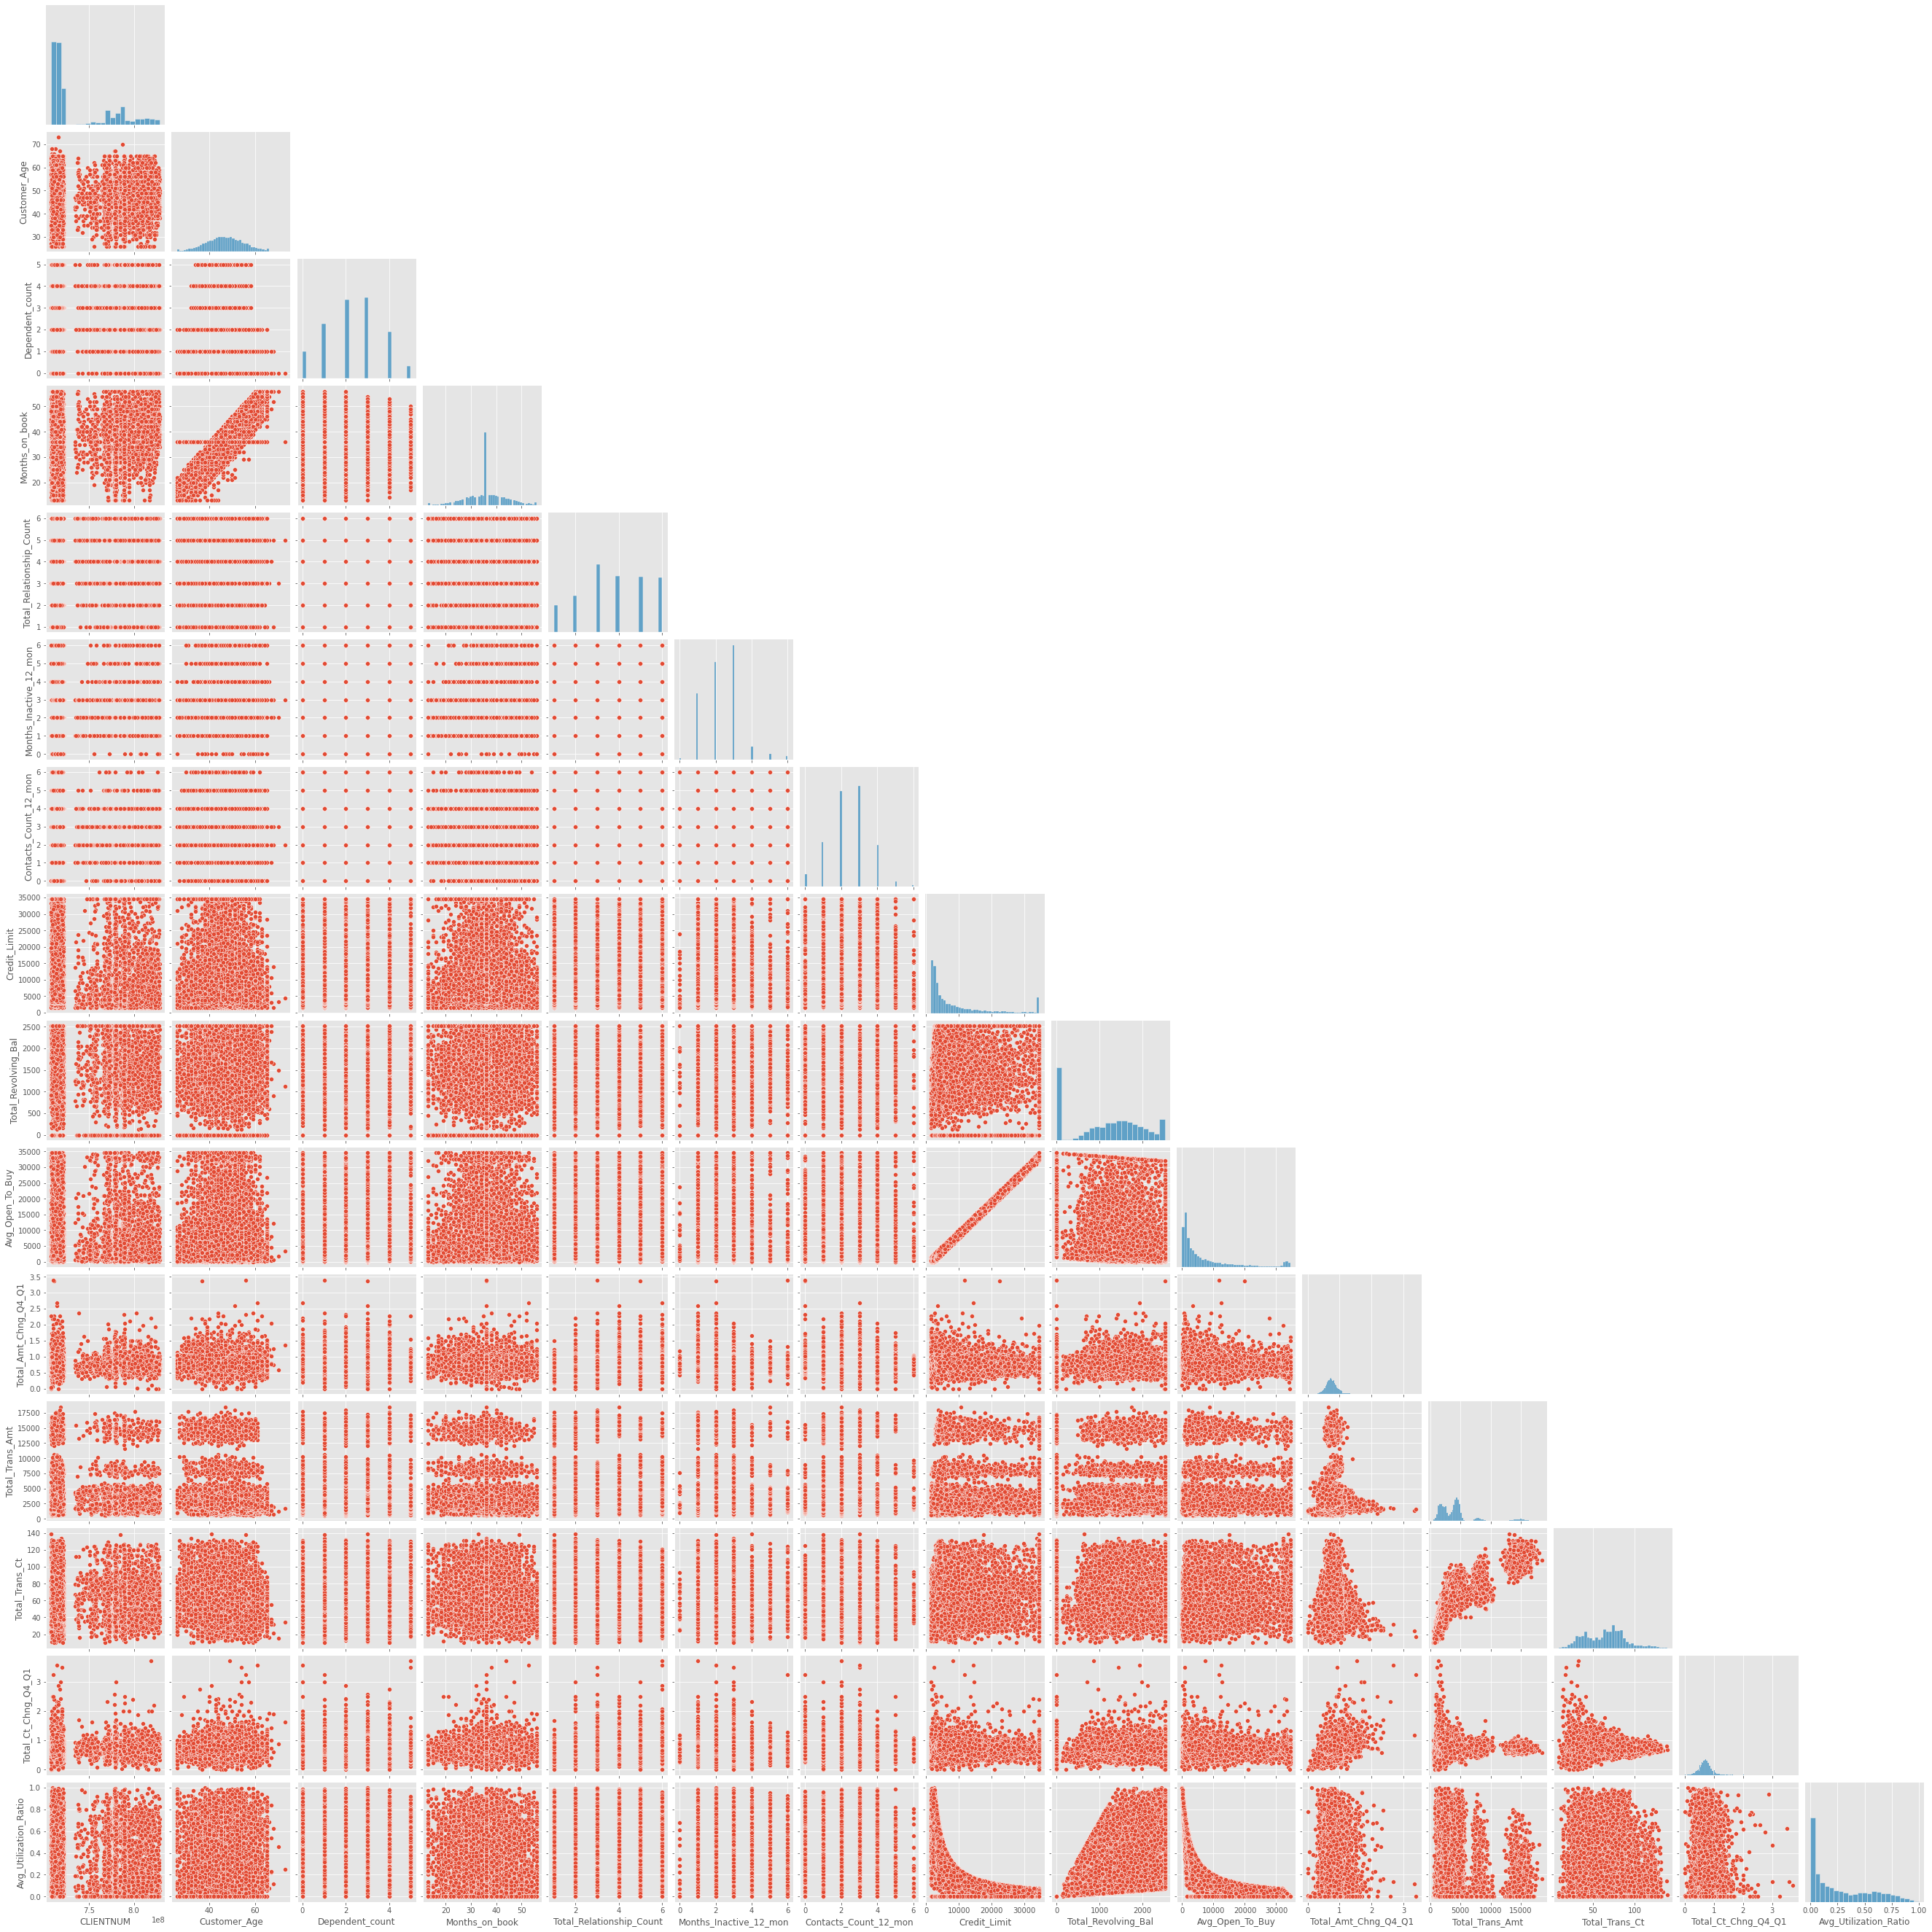

In [22]:
# Scatter plot matrix (Pairplot for all variables)
plt.style.use('ggplot')
fig = plt.figure(figsize=(10, 10))
g = sns.pairplot(df[numerical_features],corner=True)
plt.show()

## Correlation using heatmap 

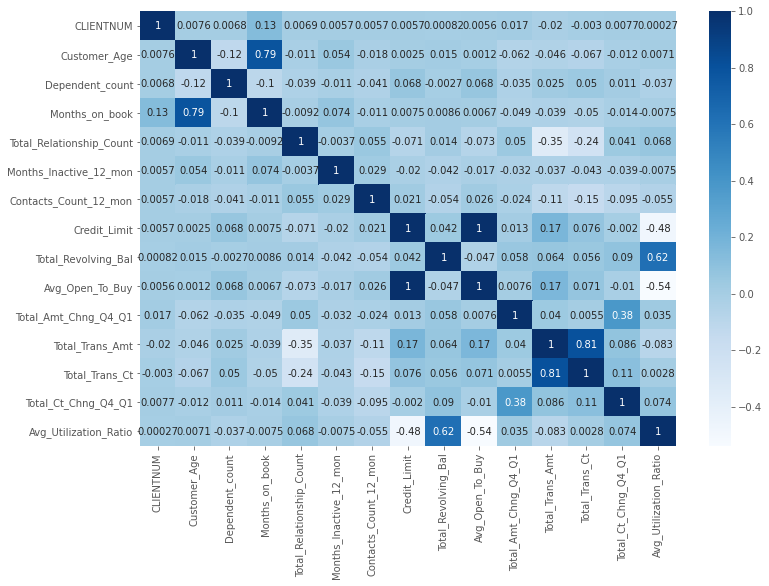

In [23]:
f, ax = plt.subplots(figsize=(12, 8)) 
sns.heatmap(df.corr(), annot=True, cmap="Blues") 
plt.show()

**Observation**
- Strongly related features
    - Total_revolving_balance and Average Utilization ration
    - Total Transaction Amount (Last 12 months) and Total Transaction Count (Last 12 months)
    - Avg open to buy and credit limit are strongly related
    - Months on book and Customer age

# Data Preprocessing

## Preprocessing to transform categorial to numerical to data pridiction

In [24]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, average_precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV

## Divide the dataset into categorical and numerical 

In [25]:
df_categorical = df[['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']]
df_categorical.head()

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,M,High School,Married,$60K - $80K,Blue
1,F,Graduate,Single,Less than $40K,Blue
2,M,Graduate,Married,$80K - $120K,Blue
3,F,High School,NaN,Less than $40K,Blue
4,M,Uneducated,Married,$60K - $80K,Blue


In [26]:
df_numerical = df[['Customer_Age', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
                      'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
                      'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]
df_numerical.head()

,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Apply One-Hot Encoding to categorical variable

In [27]:
enc = OneHotEncoder()
df_categorical_enc = pd.DataFrame(enc.fit_transform(df_categorical).toarray())
df_categorical_enc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Merge categorical and numerical dataframe

In [28]:
df_all = pd.concat([df_categorical_enc, df_numerical], axis=1)
df_all.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,45,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,49,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,51,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,40,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,40,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [29]:
X = df_all

In [30]:
y = df['Attrition_Flag']

In [31]:
le = LabelEncoder()
y = le.fit_transform(y)

## Identify Missing data

In [32]:
data1 = df.copy()

### KNN Imputer

In [33]:
# defining a list with names of columns that will be used for imputation
imputer = KNNImputer(n_neighbors=5)

reqd_col_for_impute = [
    "Education_Level",
    "Marital_Status"
]

### Marital Status and Education level converted to Numeric

In [34]:
# we need to pass numerical values for each categorical column for KNN imputation so we will label encode them
Marital_Status = {"Married": 0, "Single": 1, "Divorced": 2 , "Other" : 3}
data1["Marital_Status"] = data1["Marital_Status"].map(Marital_Status)

Education_Level = {
    "Graduate": 0,
    "High School": 2,
    "Uneducated": 3,
    "College": 4,
    "Post-Graduate":5,
    "Doctorate" : 5
}
data1["Education_Level"] = data1["Education_Level"].map(Education_Level)

In [35]:
df = data1.copy()

In [36]:
data1.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,2.0,0.0,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,0.0,1.0,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,0.0,0.0,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,2.0,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,3.0,0.0,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# Build ML Models

## Split dataset as Train , Validation and Test

In [37]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 36) (2026, 36) (2026, 36)


### Check the shape of train,validation and test data

In [38]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6075
Number of rows in validation data = 2026
Number of rows in test data = 2026


In [39]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

0                           0
1                           0
2                           0
3                           0
4                           0
5                           0
6                           0
7                           0
8                           0
9                           0
10                          0
11                          0
12                          0
13                          0
14                          0
15                          0
16                          0
17                          0
18                          0
19                          0
20                          0
21                          0
22                          0
Customer_Age                0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Tran

### Creating dummy variables

In [40]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 36) (2026, 36) (2026, 36)


## Models without Oversampling and Undersampling

### Function for confusion matrix

In [41]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [42]:
def display_confusion_matrix(y_val, y_pred):
    confusion_martix = metrics.confusion_matrix(y_val, y_pred)

    sns.set({'figure.figsize':(8,5)})
    sns.heatmap(confusion_martix, annot=True, fmt='.0f', xticklabels=[0,1], yticklabels=[0,1])
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

def analyze_model_performance(model, model_name, X_train, y_train, X_val, y_val, display_results=True):
    y_pred = model.predict(X_val)
    performance_metrics = {
        'model_name': model_name
        , 'training_accuracy': model.score(X_train, y_train)
        , 'validation_accuracy': model.score(X_val, y_val)
        , 'precision': metrics.precision_score(y_val, y_pred)
        , 'recall': metrics.recall_score(y_val, y_pred)
        , 'f1_score': metrics.f1_score(y_val, y_pred)
        , 'roc_auc_score': metrics.roc_auc_score(y_val, y_pred)
    }
    if display_results:
        for key in performance_metrics.keys():
            if key == 'model_name':
                display_value = performance_metrics[key]
            else: 
                display_value = round(performance_metrics[key], 3)
            print(f'{key}: {display_value}')
        display_confusion_matrix(y_val, y_pred)
    return performance_metrics

In [43]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [44]:
models_desc = pd.DataFrame()

### Logistic Regression (Without over / under sample)

In [45]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

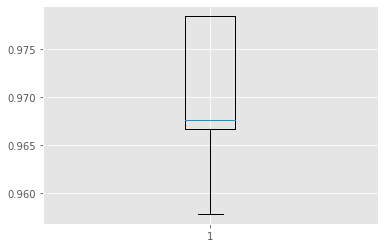

In [46]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_bfr = cross_val_score(
    estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

In [47]:
# Calculating different metrics on train set
log_reg_model_train_perf = model_performance_classification_sklearn(
    lr, X_train, y_train
)
print("Training performance:")
type(log_reg_model_train_perf)


Training performance:


pandas.core.frame.DataFrame

In [48]:
# Calculating different metrics on validation set
log_reg_model_val_perf = model_performance_classification_sklearn(lr, X_val, y_val)
print("Validation performance:")
log_reg_model_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.863771,0.962941,0.884865,0.922254


In [49]:
models_desc.append(log_reg_model_val_perf)

,Accuracy,Recall,Precision,F1
0,0.863771,0.962941,0.884865,0.922254


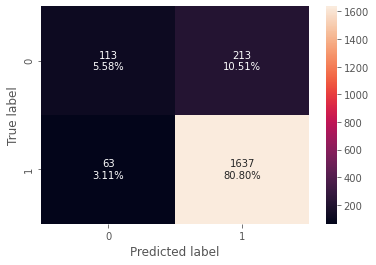

In [50]:
# creating confusion matrix
confusion_matrix_sklearn(lr, X_val, y_val)

### Decision Trees (Without over / under sample)

model_name: decision tree
training_accuracy: 1.0
validation_accuracy: 0.932
precision: 0.959
recall: 0.959
f1_score: 0.959
roc_auc_score: 0.874


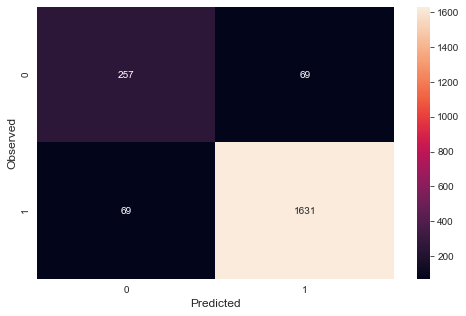

In [51]:
model_name = 'decision tree'
decision_tree_model = DecisionTreeClassifier(criterion='gini', random_state=3)
decision_tree_model.fit(X_train, y_train)
model_performance = analyze_model_performance(decision_tree_model, model_name, X_train, y_train, X_val, y_val)

### Random Forest (Without over / under sample)

model_name: random forest
training_accuracy: 1.0
validation_accuracy: 0.943
precision: 0.949
recall: 0.985
f1_score: 0.967
roc_auc_score: 0.854


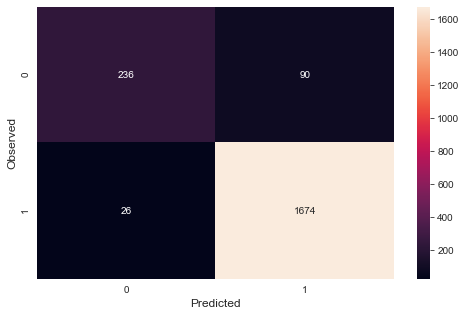

In [52]:

model_name = 'random forest'
random_forest_model = RandomForestClassifier(random_state=3)
random_forest_model.fit(X_train, y_train)
model_performance = analyze_model_performance(random_forest_model, model_name, X_train, y_train, X_val, y_val)

### Bagging (Without over / under sample)

model_name: bagging
training_accuracy: 0.998
validation_accuracy: 0.953
precision: 0.968
recall: 0.976
f1_score: 0.972
roc_auc_score: 0.904


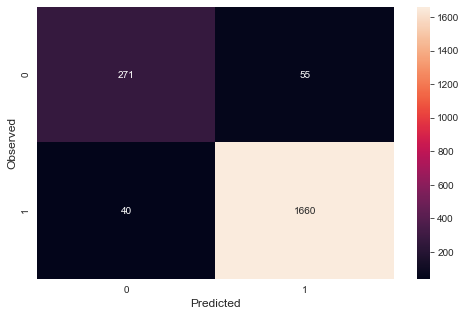

In [53]:
model_name = 'bagging'
bagging_model = BaggingClassifier(random_state=3)
bagging_model.fit(X_train, y_train)
model_performance = analyze_model_performance(bagging_model, model_name, X_train, y_train,X_val, y_val)

### Function for Confusion matrix

In [54]:
## Calculate : accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''

    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_val = model.predict(X_val)
    
    train_acc = model.score(X_train,y_train)
    val_acc = model.score(X_val,y_val)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    val_recall = metrics.recall_score(y_val,pred_val)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    val_precision = metrics.precision_score(y_val,pred_val)
    
    score_list.extend((train_acc,val_acc,train_recall,val_recall,train_precision,val_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on val set : ",model.score(X_val,y_val))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on val set : ",metrics.recall_score(y_val,pred_val))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on val set : ",metrics.precision_score(y_val,pred_val))
    
    return score_list # returning the list with train and val scores

In [55]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_val)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Adaboost (Without over / under sample)

Accuracy on training set :  0.9613168724279836
Accuracy on val set :  0.9550839091806516
Recall on training set :  0.9825455971759168
Recall on val set :  0.9823529411764705
Precision on training set :  0.9716834755624515
Precision on val set :  0.9647602541883304


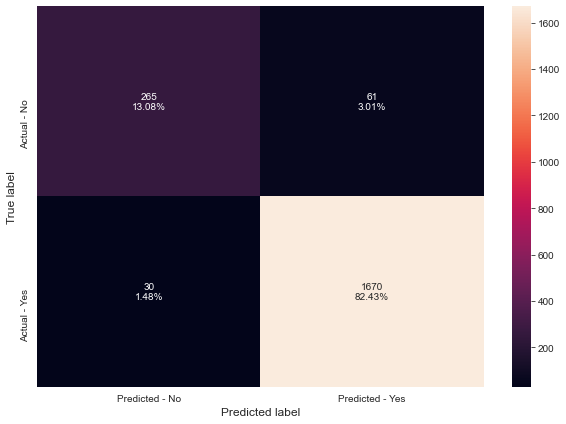

In [56]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)
abc_score=get_metrics_score(abc)
make_confusion_matrix(abc,y_val)

### Gradient Boosting (Without over / under sample)

Accuracy on training set :  0.9782716049382716
Accuracy on val set :  0.9619940769990128
Recall on training set :  0.9927436752304374
Recall on val set :  0.9894117647058823
Precision on training set :  0.9815784370758193
Precision on val set :  0.9661114302125215


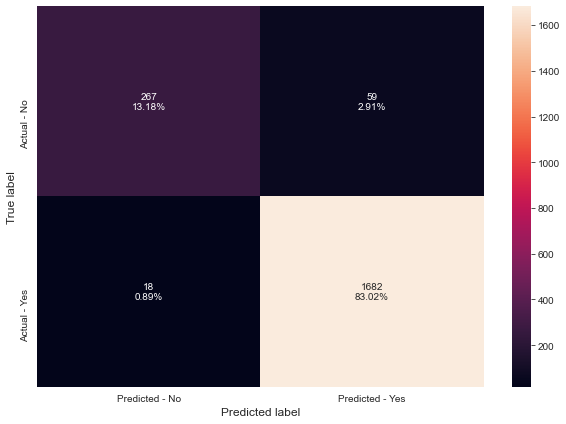

In [57]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)
gbc_score=get_metrics_score(gbc)
make_confusion_matrix(gbc,y_val)

### XgBoost (Without over / under sample)

Accuracy on training set :  1.0
Accuracy on val set :  0.9693978282329714
Recall on training set :  1.0
Recall on val set :  0.99
Precision on training set :  1.0
Precision on val set :  0.9739583333333334


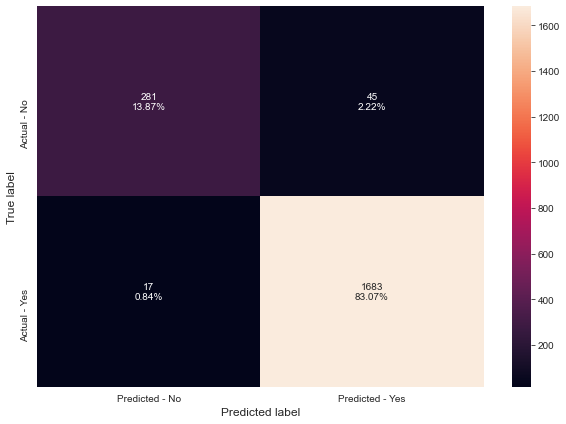

In [58]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)
xgb_score=get_metrics_score(xgb)
make_confusion_matrix(xgb,y_val)

# Oversampling

In [59]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [60]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 5099
Before UpSampling, counts of label 'No': 976 

After UpSampling, counts of label 'Yes': 5099
After UpSampling, counts of label 'No': 5099 

After UpSampling, the shape of train_X: (10198, 36)
After UpSampling, the shape of train_y: (10198,) 



## Oversampling + Logistic Regression

In [61]:
log_reg_over = LogisticRegression(random_state=1)

# Training the basic logistic regression model with training set
log_reg_over.fit(X_train_over, y_train_over)

LogisticRegression(random_state=1)

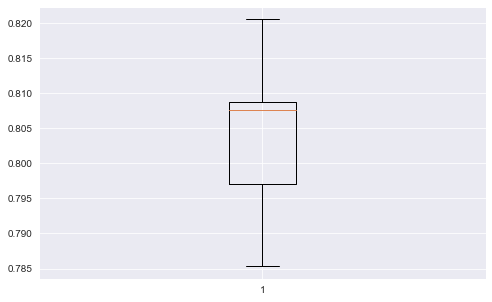

In [62]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

In [63]:
# Calculating different metrics on train set
log_reg_over_train_perf = model_performance_classification_sklearn(
    log_reg_over, X_train_over, y_train_over
)
print("Training performance:")
log_reg_over_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.820259,0.822906,0.818572,0.820733


In [64]:
# Calculating different metrics on validation set
log_reg_model_val_perf = model_performance_classification_sklearn(lr, X_val, y_val)
print("Validation performance:")
log_reg_model_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.863771,0.962941,0.884865,0.922254


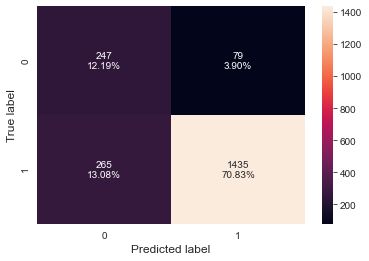

In [65]:
# creating confusion matrix
confusion_matrix_sklearn(log_reg_over, X_val, y_val)

## Oversampling + Bagging

In [66]:
bagging_model_over = BaggingClassifier(random_state=3)
bagging_model_over.fit(X_train_over, y_train_over)

BaggingClassifier(random_state=3)

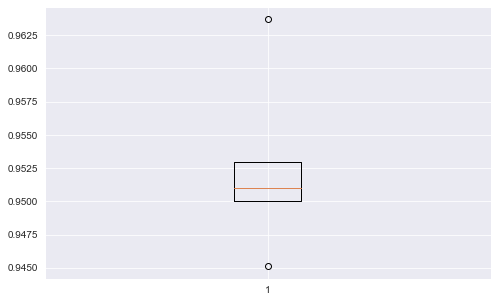

In [67]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=bagging_model_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

In [68]:
# Calculating different metrics on train set
bagging_train_perf = model_performance_classification_sklearn(
    bagging_model_over, X_train, y_train
)
print("Training performance:")
bagging_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.996049,0.995293,1.0,0.997641


In [69]:
# Calculating different metrics on validation set
bagging_val_perf = model_performance_classification_sklearn(bagging_model_over, X_val, y_val)
print("Validation performance:")
bagging_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.940276,0.950588,0.977616,0.963913


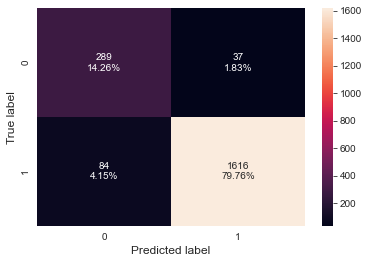

In [70]:
# creating confusion matrix
confusion_matrix_sklearn(bagging_model_over, X_val, y_val)

## Oversampling + Decision Trees

In [71]:
model_name = 'decision tree'
decision_tree_model_over = DecisionTreeClassifier(criterion='gini', random_state=3)
decision_tree_model_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier(random_state=3)

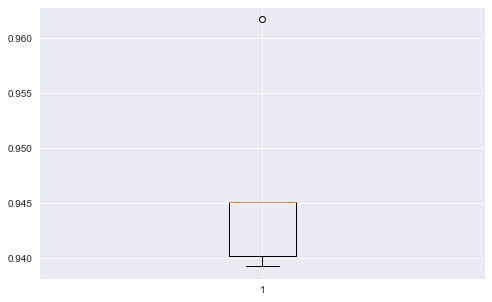

In [72]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=decision_tree_model_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

In [73]:
# Calculating different metrics on train set
decision_tree_train_perf = model_performance_classification_sklearn(
    decision_tree_model_over, X_train, y_train
)
print("Training performance:")
decision_tree_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [74]:
# Calculating different metrics on validation set
decision_tree_val_perf = model_performance_classification_sklearn(decision_tree_model_over, X_val, y_val)
print("Validation performance:")
decision_tree_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.923001,0.950588,0.957346,0.953955


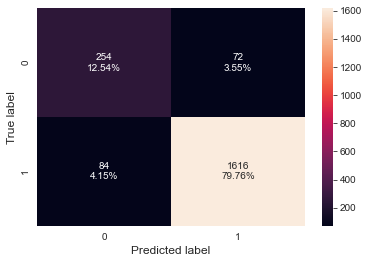

In [75]:
# creating confusion matrix
confusion_matrix_sklearn(decision_tree_model_over, X_val, y_val)

## Oversampling + Random Forest

In [76]:
random_forest_model_over = RandomForestClassifier(random_state=3)
random_forest_model_over.fit(X_train_over, y_train_over)

RandomForestClassifier(random_state=3)

In [77]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=random_forest_model_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)

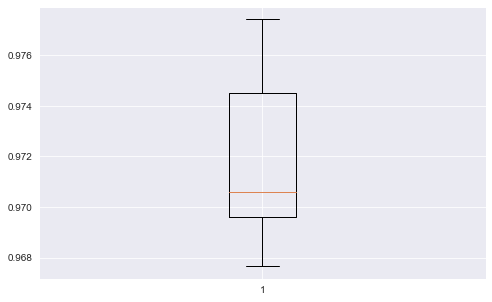

In [78]:
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

In [79]:
# Calculating different metrics on train set
random_forest_train_perf = model_performance_classification_sklearn(
    random_forest_model_over, X_train, y_train
)
print("Training performance:")
random_forest_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [80]:
# Calculating different metrics on validation set
random_forest_val_perf = model_performance_classification_sklearn(random_forest_model_over, X_val, y_val)
print("Validation performance:")
random_forest_val_perf


Validation performance:


,Accuracy,Recall,Precision,F1
0,0.943731,0.972353,0.961047,0.966667


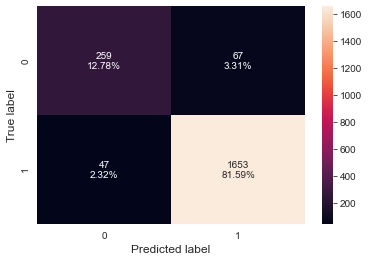

In [81]:
# creating confusion matrix
confusion_matrix_sklearn(random_forest_model_over, X_val, y_val)

## Oversampling + Adaboost

In [82]:
abc_over = AdaBoostClassifier(random_state=1)
abc_over.fit(X_train_over,y_train_over)

AdaBoostClassifier(random_state=1)

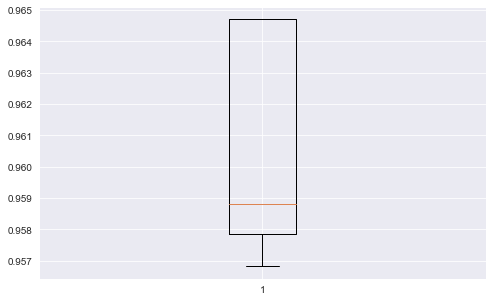

In [83]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=abc_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

In [84]:
# Calculating different metrics on train set
abc_train_perf = model_performance_classification_sklearn(
    abc_over, X_train, y_train
)
print("Training performance:")
abc_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.951934,0.961757,0.980604,0.971089


In [85]:
# Calculating different metrics on validation set
abc_val_perf = model_performance_classification_sklearn(abc_over, X_val, y_val)
print("Validation performance:")
abc_val_perf


Validation performance:


,Accuracy,Recall,Precision,F1
0,0.943731,0.956471,0.97599,0.966132


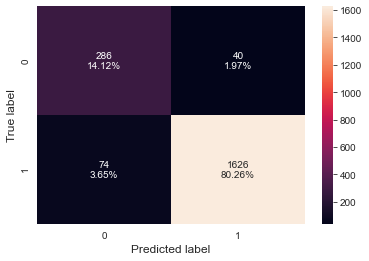

In [86]:
# creating confusion matrix
confusion_matrix_sklearn(abc_over, X_val, y_val)

## Oversampling + Gradient Boost

In [87]:
gbc_over = GradientBoostingClassifier(random_state=1)
gbc_over.fit(X_train_over,y_train_over)

GradientBoostingClassifier(random_state=1)

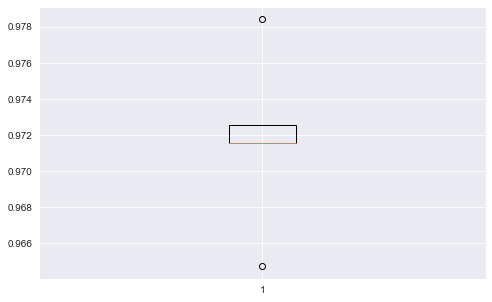

In [88]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=gbc_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

In [89]:
# Calculating different metrics on train set
gbc_train_perf = model_performance_classification_sklearn(
    gbc_over, X_train, y_train
)
print("Training performance:")
gbc_train_perf


Training performance:


,Accuracy,Recall,Precision,F1
0,0.969877,0.979015,0.985004,0.982001


In [90]:
# Calculating different metrics on validation set
gbc_val_perf = model_performance_classification_sklearn(gbc_over, X_val, y_val)
print("Validation performance:")
gbc_val_perf



Validation performance:


,Accuracy,Recall,Precision,F1
0,0.96002,0.979412,0.973115,0.976253


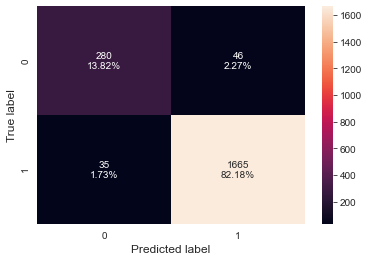

In [91]:
# creating confusion matrix
confusion_matrix_sklearn(gbc_over, X_val, y_val)

## Oversampling + XgBoost

In [92]:
xgb_over = XGBClassifier(random_state=1,eval_metric='logloss')
xgb_over.fit(X_train_over,y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

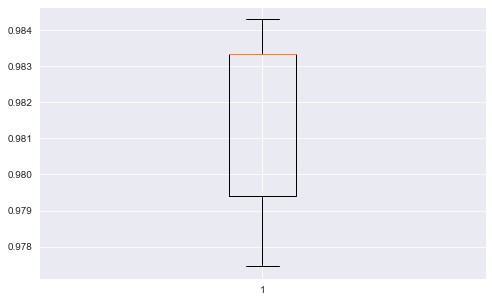

In [93]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_over = cross_val_score(
    estimator=xgb_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()


In [94]:
# Calculating different metrics on train set
xgb_train_perf = model_performance_classification_sklearn(
    xgb_over, X_train, y_train
)
print("Training performance:")
xgb_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [95]:
# Calculating different metrics on validation set
xgb_val_perf = model_performance_classification_sklearn(xgb_over, X_val, y_val)
print("Validation performance:")
xgb_val_perf


Validation performance:


,Accuracy,Recall,Precision,F1
0,0.972853,0.988824,0.979033,0.983904


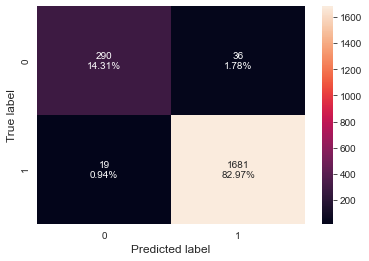

In [96]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_over, X_val, y_val)

# Undersampling

## Under sampling + Random Under Sampler

In [97]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [98]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 5099
Before Under Sampling, counts of label 'No': 976 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 36)
After Under Sampling, the shape of train_y: (1952,) 



## Under sampling + Logistic Regression

In [99]:
log_reg_under = LogisticRegression(random_state=1)
log_reg_under.fit(X_train_un, y_train_un)

LogisticRegression(random_state=1)

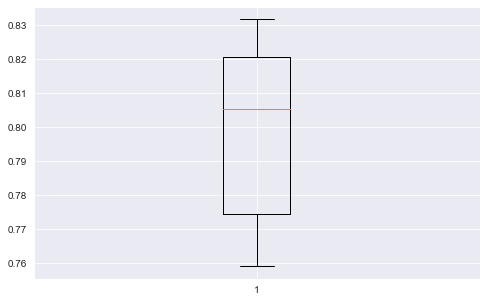

In [100]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_under = cross_val_score(
    estimator=log_reg_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

In [101]:
# Calculating different metrics on train set
log_reg_under_train_perf = model_performance_classification_sklearn(
    log_reg_under, X_train_un, y_train_un
)
print("Training performance:")
log_reg_under_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.78125,0.788934,0.776993,0.782918


In [102]:
# Calculating different metrics on validation set
log_reg_under_val_perf = model_performance_classification_sklearn(
    log_reg_under, X_val, y_val
)
print("Validation performance:")
log_reg_under_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.804047,0.812941,0.945927,0.874407


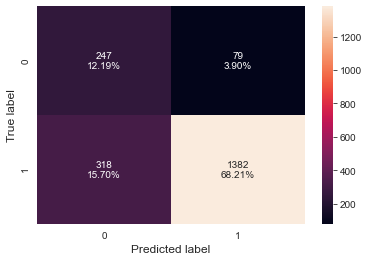

In [103]:
# creating confusion matrix
confusion_matrix_sklearn(log_reg_under, X_val, y_val)

## Under sampling + Bagging

In [104]:
bagging_model_under = BaggingClassifier(random_state=3)
bagging_model_under.fit(X_train_un, y_train_un)

BaggingClassifier(random_state=3)

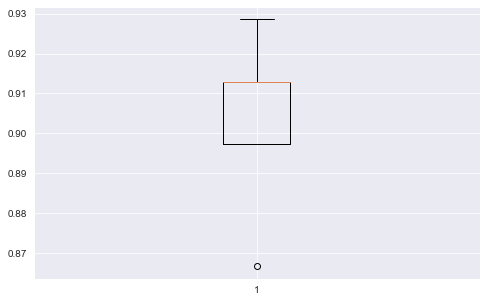

In [105]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_under = cross_val_score(
    estimator=bagging_model_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()


In [106]:
# Calculating different metrics on train set
bagging_under_train_perf = model_performance_classification_sklearn(
    bagging_model_under, X_train_un, y_train_un
)
print("Training performance:")
bagging_under_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.994877,0.989754,1.0,0.994851


In [107]:
# Calculating different metrics on validation set
bagging_under_val_perf = model_performance_classification_sklearn(
    bagging_model_under, X_val, y_val
)
print("Validation performance:")
bagging_under_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.917078,0.920588,0.979349,0.94906


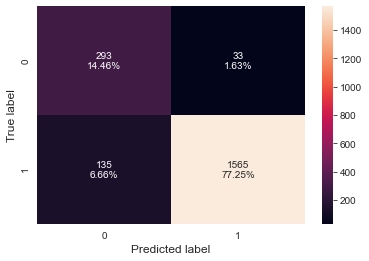

In [108]:
# creating confusion matrix
confusion_matrix_sklearn(bagging_model_under, X_val, y_val)

## Under sampling + Decision Trees

In [109]:
model_name = 'decision tree'
decision_tree_model_under = DecisionTreeClassifier(criterion='gini', random_state=3)
decision_tree_model_under.fit(X_train_un, y_train_un)

DecisionTreeClassifier(random_state=3)

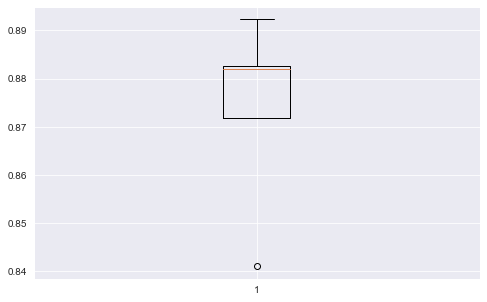

In [110]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_under = cross_val_score(
    estimator=decision_tree_model_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

In [111]:
# Calculating different metrics on train set
dt_under_train_perf = model_performance_classification_sklearn(
    decision_tree_model_under, X_train_un, y_train_un
)
print("Training performance:")
dt_under_train_perf


Training performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [112]:
# Calculating different metrics on validation set
dt_under_val_perf = model_performance_classification_sklearn(
    decision_tree_model_under, X_val, y_val
)
print("Validation performance:")
dt_under_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.910661,0.918824,0.973209,0.945234


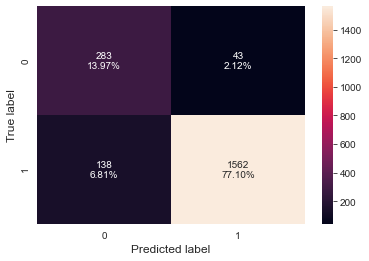

In [113]:
# creating confusion matrix
confusion_matrix_sklearn(decision_tree_model_under, X_val, y_val)

## Under sampling + Random Forest

In [114]:
random_forest_model_under = RandomForestClassifier(random_state=3)
random_forest_model_under.fit(X_train_un, y_train_un)

RandomForestClassifier(random_state=3)

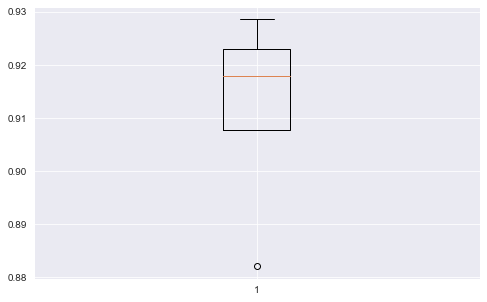

In [115]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_under = cross_val_score(
    estimator=random_forest_model_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

In [116]:
# Calculating different metrics on train set
rf_under_train_perf = model_performance_classification_sklearn(
    random_forest_model_under, X_train_un, y_train_un
)
print("Training performance:")
rf_under_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [117]:
# Calculating different metrics on validation set
rf_under_val_perf = model_performance_classification_sklearn(
    random_forest_model_under, X_val, y_val
)
print("Validation performance:")
rf_under_val_perf


Validation performance:


,Accuracy,Recall,Precision,F1
0,0.937315,0.944118,0.980452,0.961942


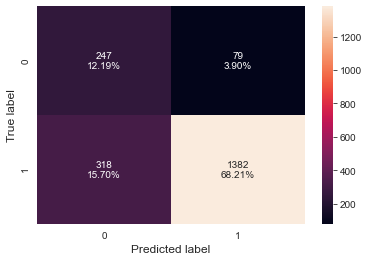

In [118]:
# creating confusion matrix
confusion_matrix_sklearn(log_reg_under, X_val, y_val)

## Under sampling + Adaboost

In [119]:
abc_under = AdaBoostClassifier(random_state=1)
abc_under.fit(X_train_un,y_train_un)

AdaBoostClassifier(random_state=1)

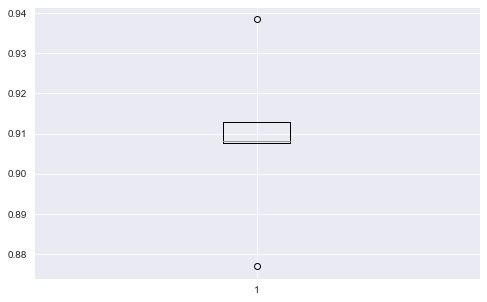

In [120]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_under = cross_val_score(
    estimator=abc_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()


In [121]:
# Calculating different metrics on train set
abc_under_train_perf = model_performance_classification_sklearn(
    abc_under, X_train_un, y_train_un
)
print("Training performance:")
abc_under_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.949795,0.943648,0.955394,0.949485


In [122]:
# Calculating different metrics on validation set
abc_under_val_perf = model_performance_classification_sklearn(
    abc_under, X_val, y_val
)
print("Validation performance:")
abc_under_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.922507,0.921765,0.984915,0.952294


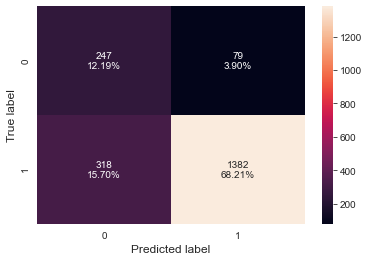

In [123]:
# creating confusion matrix
confusion_matrix_sklearn(log_reg_under, X_val, y_val)

## Under sampling + Gradient Boost

In [124]:
gbc_under = GradientBoostingClassifier(random_state=1)
gbc_under.fit(X_train_un,y_train_un)

GradientBoostingClassifier(random_state=1)

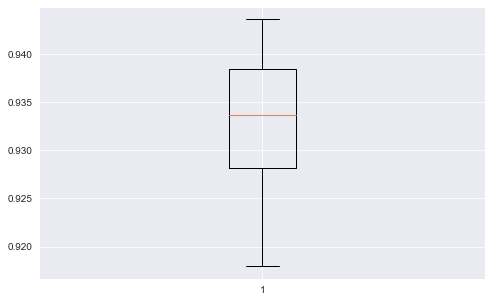

In [125]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_under = cross_val_score(
    estimator=gbc_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

In [126]:
# Calculating different metrics on train set
gb_under_train_perf = model_performance_classification_sklearn(
    gbc_under, X_train_un, y_train_un
)
print("Training performance:")
gb_under_train_perf


Training performance:


,Accuracy,Recall,Precision,F1
0,0.975922,0.972336,0.97936,0.975835


In [127]:
# Calculating different metrics on validation set
gbc_under_val_perf = model_performance_classification_sklearn(
    gbc_under, X_val, y_val
)
print("Validation performance:")
gbc_under_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.948174,0.951765,0.985984,0.968572


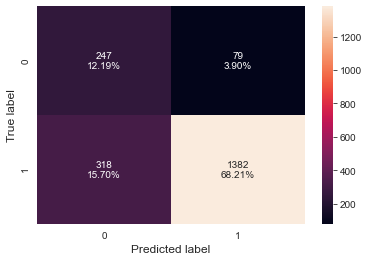

In [128]:
# creating confusion matrix
confusion_matrix_sklearn(log_reg_under, X_val, y_val)

## Under sampling + XgBoost

In [129]:
xgb_under = XGBClassifier(random_state=1,eval_metric='logloss')
xgb_under.fit(X_train_un,y_train_un)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

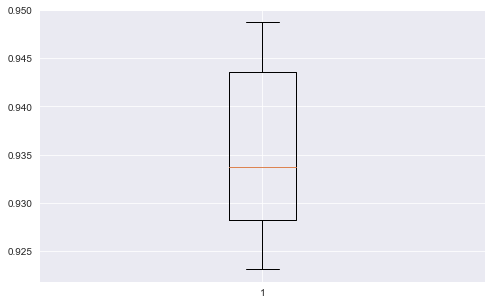

In [130]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_under = cross_val_score(
    estimator=xgb_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()


In [131]:
# Calculating different metrics on train set
xgb_under_train_perf = model_performance_classification_sklearn(
    xgb_under, X_train_un, y_train_un
)
print("Training performance:")
xgb_under_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [132]:
# Calculating different metrics on validation set
xgb_under_val_perf = model_performance_classification_sklearn(
    xgb_under, X_val, y_val
)
print("Validation performance:")
xgb_under_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.958539,0.962941,0.987334,0.974985


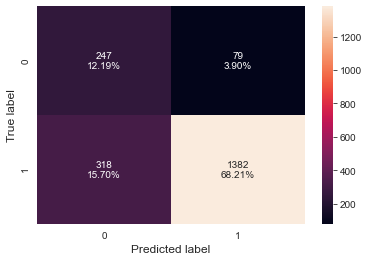

In [133]:
# creating confusion matrix
confusion_matrix_sklearn(log_reg_under, X_val, y_val)

# Model Comparison and choosing model for tuning

|Model Name | Accuracy | Recall | Precision | F1 score 
| --- | --- | --- | --- | --- |
|Oversample Logistic Regression |0.863771 | 0.962941 | 0.884865| 0.922254
|Oversample Bagging| 0.940276 |	0.950588|	0.977616|	0.963913
|Oversample Random Forest | 	0.943731 | 0.972353 | 	0.961047 |0.966667
|Oversample Decision tree | 0.923001 |	0.950588 |	0.957346 |	0.953955
|Oversample AdaBoost | 	0.943731 |	0.956471 |	0.97599	| 0.966132
|Oversample Gradient Boost | 0.96002 | 0.979412 | 	0.973115| 0.976253
|Oversample XgBoost | 0.972853 |	0.988824	| 0.979033	| 0.983904
|Undersample Logistic Regression | 0.804047 |	0.812941 |0.945927 |	0.874407
|Undersample Bagging | 0.917078 |	0.920588 |0.979349	| 0.94906
|Undersample Decision Trees | 0.910661 |	0.918824 |	0.973209 |	0.945234
|Undersample Random Forest | 0.937315 |	0.944118 |	0.980452 |	0.961942
|Undersample AdaBoost | 0.922507 |	0.921765 | 0.984915	 | 0.952294
|Undersample Gradient Boost | 0.948174 |	0.951765 |	0.985984 |	0.968572
|Undersample XgBoost | 0.958539	| 0.962941	| 0.987334	| 0.974985



# Choose Model for Tuning

|Model Name | Accuracy | Recall | Precision | F1 score 
| --- | --- | --- | --- | --- |
|Oversample Bagging| 0.940276 |	0.950588|	0.977616|	0.963913
|Oversample AdaBoost | 	0.943731 |	0.956471 |	0.97599	| 0.966132
|Oversample Gradient Boost | 0.96002 | 0.979412 | 	0.973115| 0.976253


**Observation**
- Oversampling of the data performed well for all the 6 models (in all accuracy , precision , recall and f1 score)
- Ideal choice would have been to include XgBoost as its showing highest value in all paramaters. Due to limited resource , we are ignoring Xgboost as of now
- For further analysis , we can take **Oversampling (Bagging , Adaboost and Gradient Boost) model**

# Model Hyper Parameter Tuning using RandomSearch CV

In [134]:
## Find best estimator

def find_and_train_best_estimator(estimator, hyperparameters_to_test):
    grid_obj = GridSearchCV(estimator, hyperparameters_to_test)
    grid_obj = grid_obj.fit(X_train_over, y_train_over)
    estimator = grid_obj.best_estimator_
    return estimator.fit(X_train_over, y_train_over)

## Hypertuning + Oversample Bagging

In [135]:
%time 

# defining model
model = BaggingClassifier(random_state=3)

param_grid = {
    'n_estimators': [20, 50, 75, 100, 125, 150, 200]
    ,'max_features': [.2, .5, .7, .9]
    ,'max_samples': [.2, .5, .7, .9]
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Wall time: 0 ns
Best parameters are {'n_estimators': 200, 'max_samples': 0.9, 'max_features': 0.2} with CV score=0.9935271026958379:


In [136]:
# building model with best parameters
bag_tuned2 = randomized_cv.best_estimator_

# Fit the model on training data
bag_tuned2.fit(X_train_over, y_train_over)

BaggingClassifier(max_features=0.2, max_samples=0.9, n_estimators=200,
                  random_state=3)

In [137]:
# Calculating different metrics on train set
bag_random_train = model_performance_classification_sklearn(
    bag_tuned2, X_train_over, y_train_over
)
print("Training performance:")
bag_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [138]:
# Calculating different metrics on validation set
bag_random_val = model_performance_classification_sklearn(bag_tuned2, X_val, y_val)
print("Validation performance:")
bag_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.916584,0.997059,0.911781,0.952515


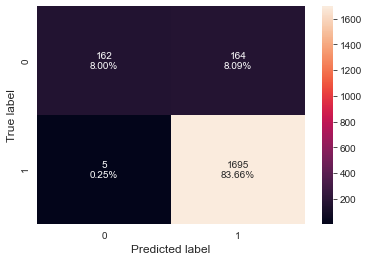

In [139]:
# creating confusion matrix
confusion_matrix_sklearn(bag_tuned2, X_val, y_val)

## Hypertuning + Oversample Adaboost Forest

In [140]:
%%time 

# defining model
model = AdaBoostClassifier(random_state=1)

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 90, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.9858779272258463:
Wall time: 2min 4s


In [141]:
# building model with best parameters
adb_tuned2 = AdaBoostClassifier(
    n_estimators=20,
    learning_rate=1,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)

# Fit the model on training data
adb_tuned2.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=1, n_estimators=20, random_state=1)

In [142]:
# Calculating different metrics on train set
Adaboost_random_train = model_performance_classification_sklearn(
    adb_tuned2, X_train_over, y_train_over
)
print("Training performance:")
Adaboost_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.988429,0.989017,0.987855,0.988436


In [143]:
# Calculating different metrics on validation set
Adaboost_random_val = model_performance_classification_sklearn(adb_tuned2, X_val, y_val)
print("Validation performance:")
Adaboost_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.951629,0.972353,0.97007,0.97121


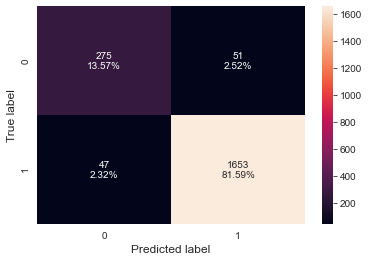

In [144]:
# creating confusion matrix
confusion_matrix_sklearn(adb_tuned2, X_val, y_val)

## Hypertuning + Oversample Gradient Boosting

In [145]:
%time 

# defining model
model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Wall time: 0 ns
Best parameters are {'subsample': 1, 'n_estimators': 250, 'max_features': 0.9} with CV score=0.9856820412168794:


In [146]:
# building model with best parameters
gb_tuned2 = randomized_cv.best_estimator_

# Fit the model on training data
gb_tuned2.fit(X_train_over, y_train_over)

GradientBoostingClassifier(max_features=0.9, n_estimators=250, random_state=1,
                           subsample=1)

In [147]:
# Calculating different metrics on train set
gb_random_train = model_performance_classification_sklearn(
    gb_tuned2, X_train_over, y_train_over
)
print("Training performance:")
gb_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.992744,0.992155,0.993324,0.992739


In [148]:
# Calculating different metrics on validation set
gb_random_val = model_performance_classification_sklearn(gb_tuned2, X_val, y_val)
print("Validation performance:")
gb_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.966436,0.982941,0.977193,0.980059


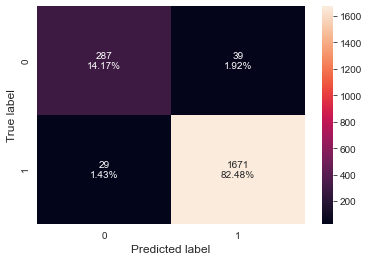

In [149]:
# creating confusion matrix
confusion_matrix_sklearn(gb_tuned2, X_val, y_val)

# Model Performance Before and After Tuning

**Before Tuning**

|Model Name | Accuracy | Recall | Precision | F1 score 
| --- | --- | --- | --- | --- |
|Oversample Bagging| 0.940276 |	0.950588|	0.977616|	0.963913
|Oversample AdaBoost | 	0.943731 |	0.956471 |	0.97599	| 0.966132
|Oversample Gradient Boost | 0.96002 | 0.979412 | 	0.973115| 0.976253


**After Tuning**

|Model Name | Accuracy | Recall | Precision | F1 score 
| --- | --- | --- | --- | --- |
|Oversample Bagging| 0.916584 |	0.997059|	0.911781|	0.952515
|Oversample AdaBoost | 0.951629 |	0.972353 |	0.97007 |	0.9712
|Oversample Gradient Boost | 0.966436 |	0.982941|0.977193|0.980059

**Observation**
- We see most of the models (after hypertuning) , recall (especially) and precision increased a bit
- Hypertuning on Oversampled Gradient Boost model is considered to be performing better than most of them

# Performance on Test Data (Using Hyperparamter tuned Gradient Boost)

In [150]:
# Calculating different metrics on the test set
gbm_random_test = model_performance_classification_sklearn(gb_tuned2, X_test, y_test)
print("Test performance:")
gbm_random_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.970879,0.987066,0.978438,0.982733


# Feature Importance (Using Hyperparamter tuned Gradient Boost) 

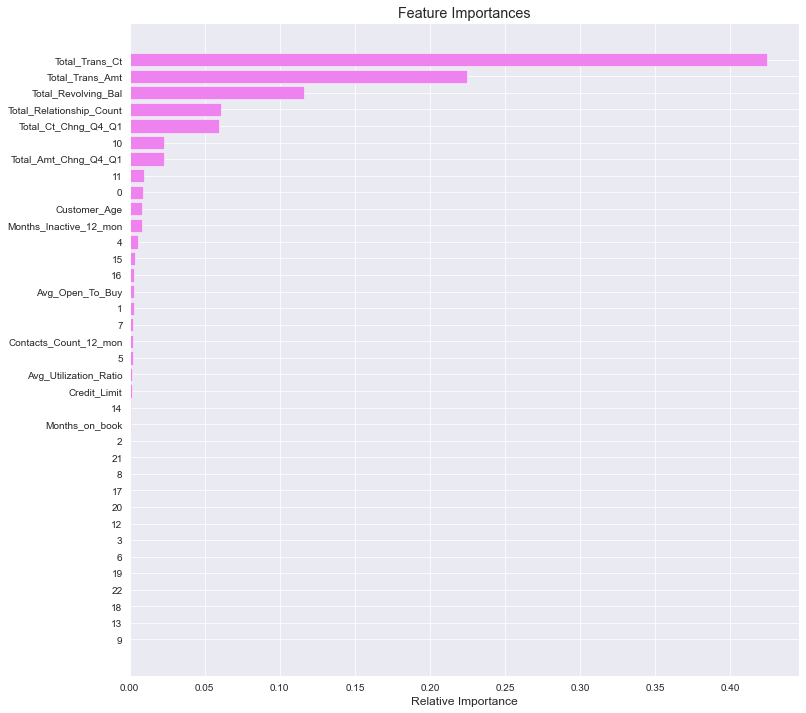

In [151]:
feature_names = X.columns
importances = gb_tuned2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Observations on Test data
- Model seems to be generalized
- Below feaures are more critical 
    - Total_Trans_Ct: Total Transaction Count (Last 12 months)
    - Total_Trans_Amt: Total Transaction Amount (Last 12 months)
    - Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
    - Total_Relationship_Count: Total no. of products held by the customer
    - Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter

# Productionize model using Gradient Boost

In [159]:
# creating a list of numerical variables
numerical_features = [
    "CLIENTNUM",
    "Customer_Age",
"Dependent_count",
"Months_on_book",
"Total_Relationship_Count",
"Months_Inactive_12_mon",
"Contacts_Count_12_mon",
"Credit_Limit",
"Total_Revolving_Bal",
"Avg_Open_To_Buy",
"Total_Amt_Chng_Q4_Q1",
"Total_Trans_Amt",
"Total_Trans_Ct",
"Total_Ct_Chng_Q4_Q1",
"Avg_Utilization_Ratio"

]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# creating a list of categorical variables
categorical_features = ["Gender","Education_Level","Marital_Status","Income_Category","Card_Category"]



# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data 
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes


In [153]:
# Separating target variable and other variables
X = data1.drop(columns="Attrition_Flag")
Y = data1["Attrition_Flag"]

In [160]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 20) (3039, 20)


In [161]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "GBM",
            GradientBoostingClassifier(
                random_state=1,
                n_estimators=50,
                subsample=1,
                learning_rate=0.05,
                max_depth=1,
            ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['CLIENTNUM', 'Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
               

# Actionable Insights & Recommendations

- We can conclude that the top 3 most influential features are the product variables: "Total_Trans_Ct", "Total_Trans_Amt", "Total_Revolving_Bal". 
- Oversampled or Upsampled data with Gradient Boost model reaches a recall score of 98.7%
- We were able to identify 98.7% correctly
- Customers with higher number of transactions are expected to retain logner
- **Customers who have churned are highly educated** - A high proportion of education level of attrited customer is Graduate level , followed by Post-Graduate level
- The proportion of attrited customers by gender **there are more male than female who have churned**
- A high proportion of marital status of customers who have churned is Married , followed by Single  compared to Divorced and Unknown status
- Seems customers with higher income doesn't likely to leave credit card services* 